## 1. Import des bibliothèques

In [3]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.precision', 2)

print(" Bibliothèques importées avec succès!")

 Bibliothèques importées avec succès!


## 2. Chargement et exploration des données

In [4]:
# Chargement du dataset
df = pd.read_csv('social_posts.csv')

# Conversion de la colonne date en datetime
df['date'] = pd.to_datetime(df['date'])

print(" Dataset chargé avec succès!")
print(f"\nNombre de publications: {len(df)}")
print(f"\nAperçu des données:")
df.head(10)

 Dataset chargé avec succès!

Nombre de publications: 30

Aperçu des données:


,post_id,date,platform,content_type,likes,comments,shares,reach,impressions
0,1,2025-01-15 09:00:00,Instagram,carousel,450,23,12,8500,12000
1,2,2025-01-15 14:00:00,Facebook,image,320,15,8,6200,9500
2,3,2025-01-15 18:00:00,LinkedIn,article,180,42,25,5400,7800
3,4,2025-01-16 10:00:00,Instagram,reel,890,67,45,15000,22000
4,5,2025-01-16 13:00:00,Twitter,text,210,34,56,7800,11000
5,6,2025-01-16 19:00:00,Instagram,story,340,12,0,9200,9200
6,7,2025-01-17 08:00:00,LinkedIn,image,420,38,18,9500,13000
7,8,2025-01-17 12:00:00,Facebook,video,680,54,32,11000,16500
8,9,2025-01-17 17:00:00,Instagram,image,520,29,14,9800,14200
9,10,2025-01-18 09:30:00,Twitter,image,380,28,41,8900,12800


In [5]:
# Informations sur le dataset
print(" Informations sur le dataset:")
print(df.info())
print("\n" + "="*70)
print(" Statistiques descriptives:")
df.describe()

 Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   post_id       30 non-null     int64         
 1   date          30 non-null     datetime64[ns]
 2   platform      30 non-null     object        
 3   content_type  30 non-null     object        
 4   likes         30 non-null     int64         
 5   comments      30 non-null     int64         
 6   shares        30 non-null     int64         
 7   reach         30 non-null     int64         
 8   impressions   30 non-null     int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.2+ KB
None

 Statistiques descriptives:


,post_id,date,likes,comments,shares,reach,impressions
count,30.00,30,30.00,30.00,30.00,30.00,30.00
mean,15.50,2025-01-20 01:54:00,525.67,43.40,32.07,10193.33,14566.67
min,1.00,2025-01-15 09:00:00,180.00,12.00,0.00,5400.00,7800.00
25%,8.25,2025-01-17 13:15:00,340.00,24.25,14.50,7900.00,10500.00
50%,15.50,2025-01-20 02:00:00,465.00,38.00,30.00,9650.00,13350.00
75%,22.75,2025-01-22 11:15:00,677.50,53.50,44.75,11375.00,17025.00
max,30.00,2025-01-24 20:00:00,1200.00,98.00,78.00,18500.00,28000.00
std,8.80,NaN,261.83,24.56,21.14,3458.02,5379.36


In [6]:
# Vérification des valeurs manquantes
print(" Vérification des valeurs manquantes:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\n Total des valeurs manquantes: {missing_values.sum()}")

 Vérification des valeurs manquantes:
post_id         0
date            0
platform        0
content_type    0
likes           0
comments        0
shares          0
reach           0
impressions     0
dtype: int64

 Total des valeurs manquantes: 0


## 3. Calcul des métriques clés

In [7]:
# Calcul du taux d'engagement (Engagement Rate)
# Formule: (Likes + Comments + Shares) / Reach * 100

df['total_engagement'] = df['likes'] + df['comments'] + df['shares']
df['engagement_rate'] = (df['total_engagement'] / df['reach']) * 100

# Calcul du taux de conversion reach -> impressions
df['impression_rate'] = (df['impressions'] / df['reach']) * 100

# Extraction des informations temporelles
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()
df['date_only'] = df['date'].dt.date

print(" Métriques calculées avec succès!")
print("\n Aperçu des nouvelles colonnes:")
df[['post_id', 'platform', 'total_engagement', 'engagement_rate', 'impression_rate']].head()

 Métriques calculées avec succès!

 Aperçu des nouvelles colonnes:


,post_id,platform,total_engagement,engagement_rate,impression_rate
0,1,Instagram,485,5.71,141.18
1,2,Facebook,343,5.53,153.23
2,3,LinkedIn,247,4.57,144.44
3,4,Instagram,1002,6.68,146.67
4,5,Twitter,300,3.85,141.03


In [8]:
# Statistiques globales
print("="*70)
print(" STATISTIQUES GLOBALES")
print("="*70)
print(f"\n Engagement Rate moyen: {df['engagement_rate'].mean():.2f}%")
print(f" Engagement Rate médian: {df['engagement_rate'].median():.2f}%")
print(f" Engagement Rate max: {df['engagement_rate'].max():.2f}%")
print(f"\n Reach moyen: {df['reach'].mean():.0f}")
print(f" Reach total: {df['reach'].sum():,}")
print(f"\n Impressions moyennes: {df['impressions'].mean():.0f}")
print(f" Impressions totales: {df['impressions'].sum():,}")
print(f"\n Engagement total: {df['total_engagement'].sum():,}")
print(f"   - Likes: {df['likes'].sum():,}")
print(f"   - Comments: {df['comments'].sum():,}")
print(f"   - Shares: {df['shares'].sum():,}")

 STATISTIQUES GLOBALES

 Engagement Rate moyen: 5.67%
 Engagement Rate médian: 5.65%
 Engagement Rate max: 7.44%

 Reach moyen: 10193
 Reach total: 305,800

 Impressions moyennes: 14567
 Impressions totales: 437,000

 Engagement total: 18,034
   - Likes: 15,770
   - Comments: 1,302
   - Shares: 962


## 4. Analyse par plateforme

In [9]:
# Statistiques par plateforme
platform_stats = df.groupby('platform').agg({
    'post_id': 'count',
    'likes': 'mean',
    'comments': 'mean',
    'shares': 'mean',
    'reach': 'mean',
    'impressions': 'mean',
    'engagement_rate': 'mean',
    'total_engagement': 'sum'
}).round(2)

platform_stats.columns = ['Nb Posts', 'Likes Moy', 'Comments Moy', 'Shares Moy', 
                          'Reach Moy', 'Impressions Moy', 'Eng Rate %', 'Eng Total']

print("="*70)
print(" STATISTIQUES PAR PLATEFORME")
print("="*70)
print(platform_stats)

# Tri par engagement rate
print("\n Classement par taux d'engagement:")
print(platform_stats[['Eng Rate %']].sort_values('Eng Rate %', ascending=False))

 STATISTIQUES PAR PLATEFORME
           Nb Posts  Likes Moy  Comments Moy  Shares Moy  Reach Moy  \
platform                                                              
Facebook          7     458.57         33.29       20.00    8257.14   
Instagram        12     675.83         46.58       29.17   12225.00   
LinkedIn          6     501.67         60.33       40.83   10266.67   
Twitter           5     288.00         29.60       45.40    7940.00   

           Impressions Moy  Eng Rate %  Eng Total  
platform                                           
Facebook          12228.57        6.03       3583  
Instagram         17316.67        5.95       9019  
LinkedIn          14483.33        5.64       3617  
Twitter           11340.00        4.50       1815  

 Classement par taux d'engagement:
           Eng Rate %
platform             
Facebook         6.03
Instagram        5.95
LinkedIn         5.64
Twitter          4.50


In [10]:
# Analyse par type de contenu
content_stats = df.groupby('content_type').agg({
    'post_id': 'count',
    'engagement_rate': 'mean',
    'reach': 'mean',
    'total_engagement': 'sum'
}).round(2)

content_stats.columns = ['Nb Posts', 'Eng Rate %', 'Reach Moy', 'Eng Total']

print("="*70)
print(" STATISTIQUES PAR TYPE DE CONTENU")
print("="*70)
print(content_stats.sort_values('Eng Rate %', ascending=False))

 STATISTIQUES PAR TYPE DE CONTENU
              Nb Posts  Eng Rate %  Reach Moy  Eng Total
content_type                                            
video                4        6.88   12625.00       3468
reel                 4        6.87   16875.00       4648
carousel             4        6.18   10175.00       2528
image                9        5.49    8933.33       4410
article              2        5.01    6800.00        693
text                 5        4.64    6680.00       1530
story                2        3.84    9850.00        757


## 5. Identification des meilleurs horaires de publication

In [11]:
# Analyse par heure de la journée
hourly_stats = df.groupby('hour').agg({
    'post_id': 'count',
    'engagement_rate': 'mean',
    'reach': 'mean',
    'total_engagement': 'mean'
}).round(2)

hourly_stats.columns = ['Nb Posts', 'Eng Rate %', 'Reach Moy', 'Eng Moy']

print("="*70)
print(" ANALYSE PAR HEURE DE PUBLICATION")
print("="*70)
print(hourly_stats)

print("\n Top 5 des meilleures heures (par taux d'engagement):")
top_hours = hourly_stats.sort_values('Eng Rate %', ascending=False).head(5)
for idx, row in top_hours.iterrows():
    print(f"   {idx}h00 - Engagement Rate: {row['Eng Rate %']:.2f}% (Reach moyen: {row['Reach Moy']:.0f})")

 ANALYSE PAR HEURE DE PUBLICATION
      Nb Posts  Eng Rate %  Reach Moy  Eng Moy
hour                                          
7            1        5.79    9100.00   527.00
8            2        5.30    8100.00   425.50
9            3        4.87    9300.00   446.33
10           2        6.65   15600.00  1037.50
11           2        6.79   13850.00   941.00
12           2        6.10   10900.00   666.00
13           3        4.81    8400.00   414.67
14           2        5.42    7750.00   418.50
15           2        6.26   10300.00   645.00
16           1        7.44   18500.00  1376.00
17           2        6.13   10650.00   656.00
18           3        5.58   10466.67   630.00
19           2        5.39   10500.00   586.00
20           2        5.53    5950.00   329.00
21           1        3.83    6500.00   249.00

 Top 5 des meilleures heures (par taux d'engagement):
   16h00 - Engagement Rate: 7.44% (Reach moyen: 18500)
   11h00 - Engagement Rate: 6.79% (Reach moyen: 13850)
  

In [12]:
# Analyse par plateforme et heure
platform_hour = df.groupby(['platform', 'hour'])['engagement_rate'].mean().reset_index()

print("="*70)
print(" MEILLEURES HEURES PAR PLATEFORME")
print("="*70)

for platform in df['platform'].unique():
    platform_data = platform_hour[platform_hour['platform'] == platform]
    best_hour = platform_data.loc[platform_data['engagement_rate'].idxmax()]
    print(f"\n{platform}:")
    print(f"   Meilleure heure: {int(best_hour['hour'])}h00")
    print(f"   Engagement Rate: {best_hour['engagement_rate']:.2f}%")

 MEILLEURES HEURES PAR PLATEFORME

Instagram:
   Meilleure heure: 16h00
   Engagement Rate: 7.44%

Facebook:
   Meilleure heure: 12h00
   Engagement Rate: 6.96%

LinkedIn:
   Meilleure heure: 11h00
   Engagement Rate: 6.79%

Twitter:
   Meilleure heure: 14h00
   Engagement Rate: 5.31%


## 6. Visualisations

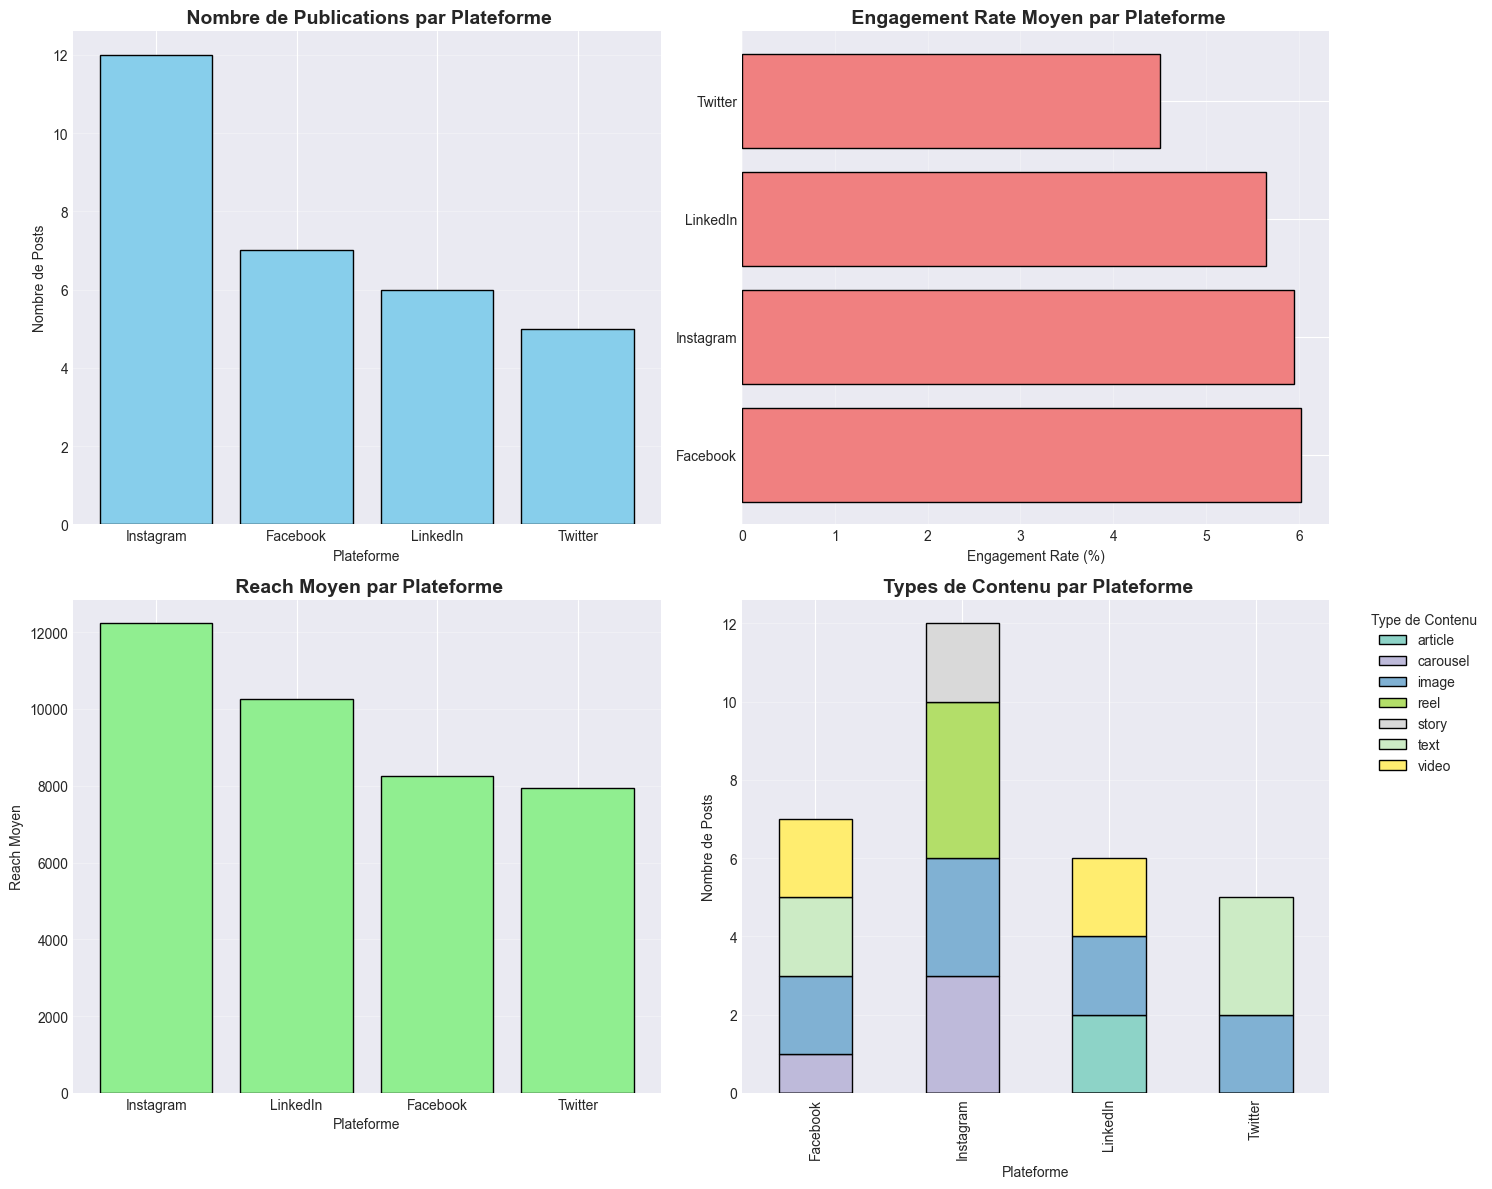

 Graphique 'analyse_plateformes.png' sauvegardé!


In [14]:
# Visualisation 1: Distribution des posts par plateforme
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graphique 1: Nombre de posts par plateforme
platform_counts = df['platform'].value_counts()
axes[0, 0].bar(platform_counts.index, platform_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title(' Nombre de Publications par Plateforme', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Plateforme')
axes[0, 0].set_ylabel('Nombre de Posts')
axes[0, 0].grid(axis='y', alpha=0.3)

# Graphique 2: Engagement Rate moyen par plateforme
platform_eng = df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=False)
axes[0, 1].barh(platform_eng.index, platform_eng.values, color='lightcoral', edgecolor='black')
axes[0, 1].set_title(' Engagement Rate Moyen par Plateforme', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Engagement Rate (%)')
axes[0, 1].grid(axis='x', alpha=0.3)

# Graphique 3: Reach moyen par plateforme
platform_reach = df.groupby('platform')['reach'].mean().sort_values(ascending=False)
axes[1, 0].bar(platform_reach.index, platform_reach.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_title(' Reach Moyen par Plateforme', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Plateforme')
axes[1, 0].set_ylabel('Reach Moyen')
axes[1, 0].grid(axis='y', alpha=0.3)

# Graphique 4: Type de contenu par plateforme
content_platform = pd.crosstab(df['platform'], df['content_type'])
content_platform.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='Set3', edgecolor='black')
axes[1, 1].set_title(' Types de Contenu par Plateforme', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Plateforme')
axes[1, 1].set_ylabel('Nombre de Posts')
axes[1, 1].legend(title='Type de Contenu', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('analyse_plateformes.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique 'analyse_plateformes.png' sauvegardé!")

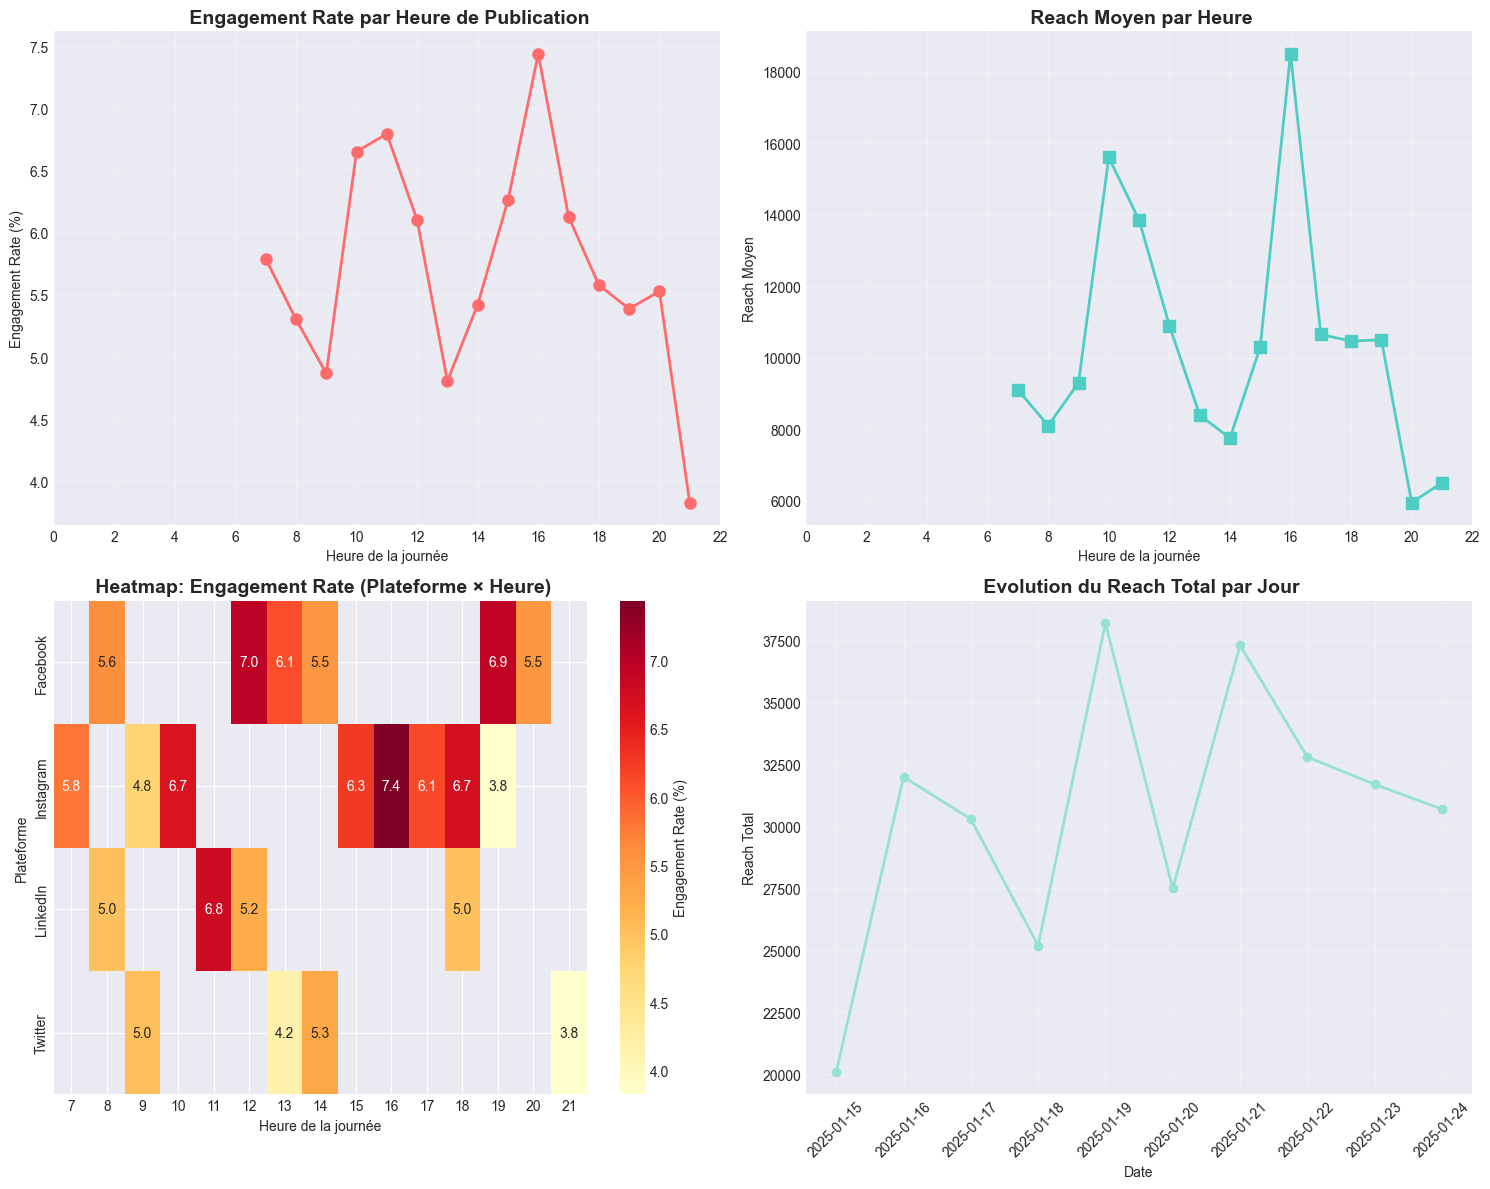

 Graphique 'analyse_temporelle.png' sauvegardé!


In [15]:
# Visualisation 2: Analyse temporelle
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graphique 1: Engagement Rate par heure
hourly_engagement = df.groupby('hour')['engagement_rate'].mean()
axes[0, 0].plot(hourly_engagement.index, hourly_engagement.values, marker='o', 
                linewidth=2, markersize=8, color='#FF6B6B')
axes[0, 0].set_title(' Engagement Rate par Heure de Publication', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Heure de la journée')
axes[0, 0].set_ylabel('Engagement Rate (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# Graphique 2: Reach par heure
hourly_reach = df.groupby('hour')['reach'].mean()
axes[0, 1].plot(hourly_reach.index, hourly_reach.values, marker='s', 
                linewidth=2, markersize=8, color='#4ECDC4')
axes[0, 1].set_title(' Reach Moyen par Heure', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Heure de la journée')
axes[0, 1].set_ylabel('Reach Moyen')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(0, 24, 2))

# Graphique 3: Heatmap Plateforme vs Heure
pivot_engagement = df.pivot_table(values='engagement_rate', index='platform', 
                                  columns='hour', aggfunc='mean')
sns.heatmap(pivot_engagement, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1, 0], 
            cbar_kws={'label': 'Engagement Rate (%)'})
axes[1, 0].set_title(' Heatmap: Engagement Rate (Plateforme × Heure)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Heure de la journée')
axes[1, 0].set_ylabel('Plateforme')

# Graphique 4: Evolution du reach dans le temps
daily_reach = df.groupby('date_only')['reach'].sum()
axes[1, 1].plot(daily_reach.index, daily_reach.values, marker='o', 
                linewidth=2, markersize=6, color='#95E1D3')
axes[1, 1].set_title(' Evolution du Reach Total par Jour', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Reach Total')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('analyse_temporelle.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique 'analyse_temporelle.png' sauvegardé!")

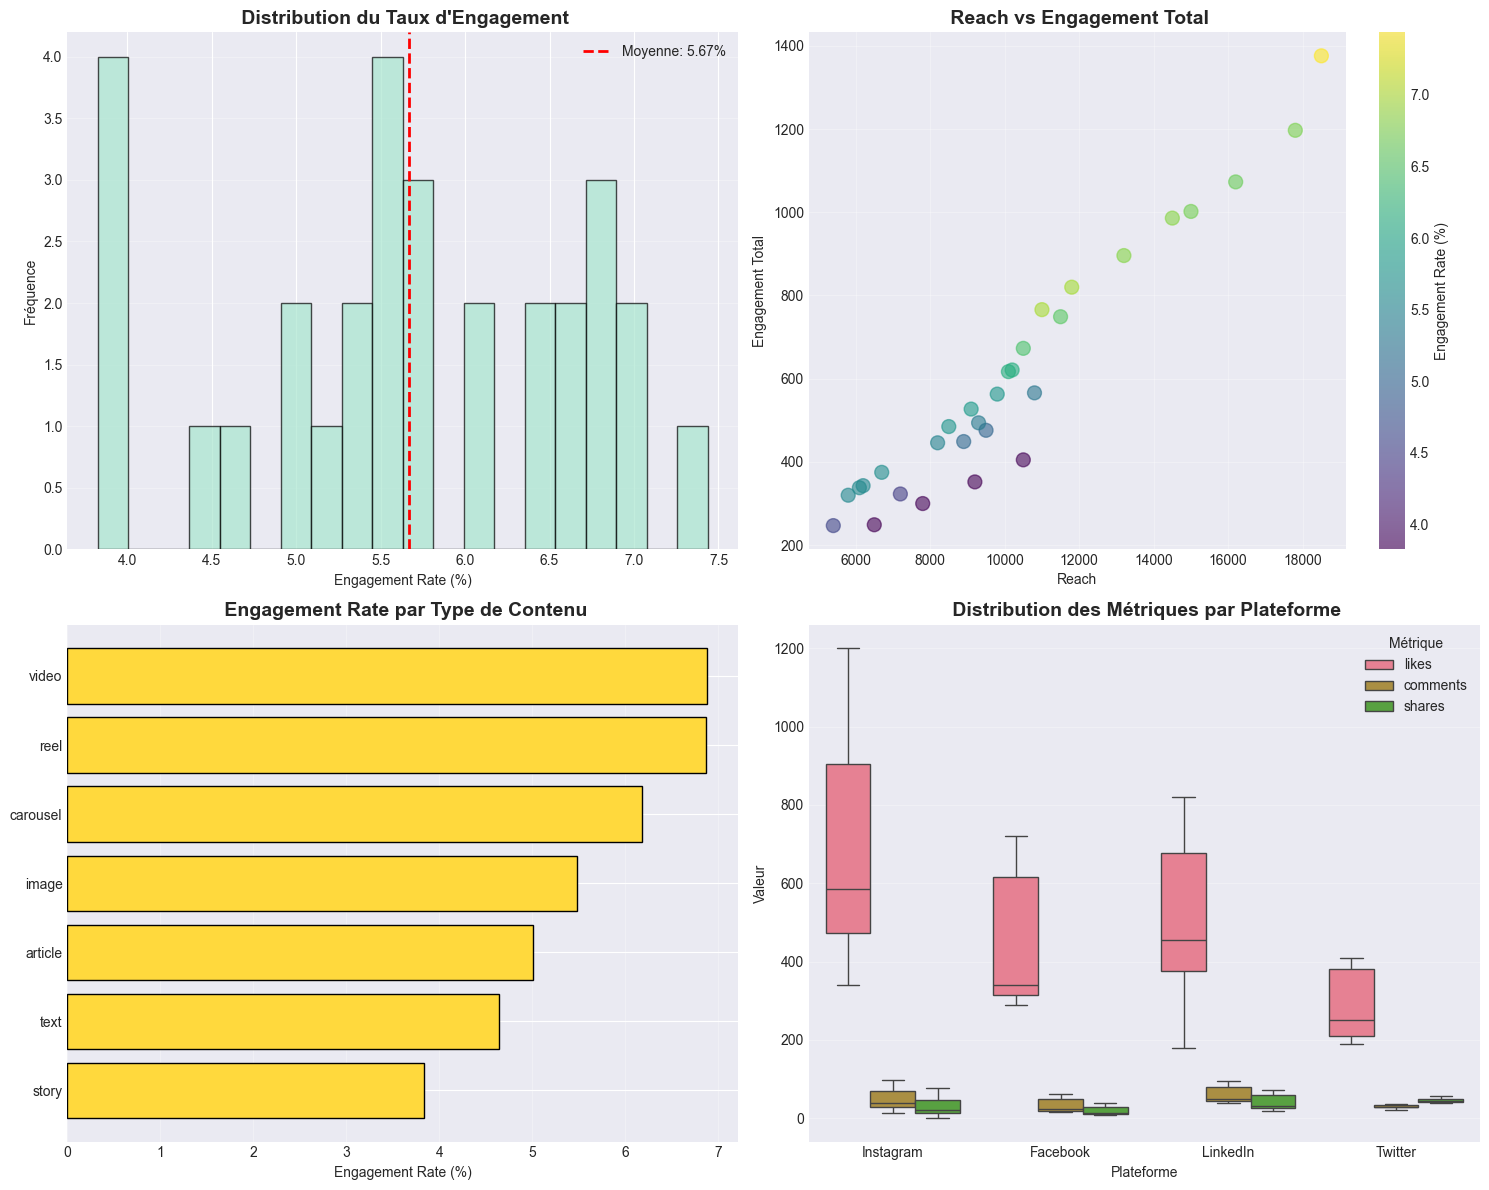

 Graphique 'analyse_engagement.png' sauvegardé!


In [16]:
# Visualisation 3: Analyse des métriques d'engagement
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graphique 1: Distribution de l'engagement rate
axes[0, 0].hist(df['engagement_rate'], bins=20, color='#A8E6CF', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['engagement_rate'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Moyenne: {df["engagement_rate"].mean():.2f}%')
axes[0, 0].set_title(' Distribution du Taux d\'Engagement', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Engagement Rate (%)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Graphique 2: Corrélation Reach vs Engagement
axes[0, 1].scatter(df['reach'], df['total_engagement'], alpha=0.6, 
                   c=df['engagement_rate'], cmap='viridis', s=100)
axes[0, 1].set_title(' Reach vs Engagement Total', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Reach')
axes[0, 1].set_ylabel('Engagement Total')
cbar = plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])
cbar.set_label('Engagement Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

# Graphique 3: Performance par type de contenu
content_engagement = df.groupby('content_type')['engagement_rate'].mean().sort_values(ascending=True)
axes[1, 0].barh(content_engagement.index, content_engagement.values, 
                color='#FFD93D', edgecolor='black')
axes[1, 0].set_title(' Engagement Rate par Type de Contenu', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Engagement Rate (%)')
axes[1, 0].grid(axis='x', alpha=0.3)

# Graphique 4: Box plot des métriques par plateforme
df_melted = df.melt(id_vars=['platform'], 
                    value_vars=['likes', 'comments', 'shares'],
                    var_name='Métrique', value_name='Valeur')
sns.boxplot(data=df_melted, x='platform', y='Valeur', hue='Métrique', ax=axes[1, 1])
axes[1, 1].set_title(' Distribution des Métriques par Plateforme', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Plateforme')
axes[1, 1].set_ylabel('Valeur')
axes[1, 1].legend(title='Métrique')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('analyse_engagement.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique 'analyse_engagement.png' sauvegardé!")

## 7. Top Performers

In [17]:
# Top 10 des posts avec le meilleur engagement rate
print("="*70)
print(" TOP 10 - MEILLEURS POSTS PAR ENGAGEMENT RATE")
print("="*70)

top_posts = df.nlargest(10, 'engagement_rate')[['post_id', 'platform', 'content_type', 
                                                  'hour', 'engagement_rate', 'reach', 
                                                  'total_engagement']]
print(top_posts.to_string(index=False))

# Top 5 par reach
print("\n" + "="*70)
print(" TOP 5 - MEILLEURS POSTS PAR REACH")
print("="*70)

top_reach = df.nlargest(5, 'reach')[['post_id', 'platform', 'content_type', 
                                      'hour', 'reach', 'impressions', 'engagement_rate']]
print(top_reach.to_string(index=False))

 TOP 10 - MEILLEURS POSTS PAR ENGAGEMENT RATE
 post_id  platform content_type  hour  engagement_rate  reach  total_engagement
      14 Instagram         reel    16             7.44  18500              1376
       8  Facebook        video    12             6.96  11000               766
      21  Facebook        video    19             6.95  11800               820
      28  LinkedIn        video    11             6.80  14500               986
      13  LinkedIn        video    11             6.79  13200               896
      27 Instagram         reel    18             6.72  17800              1197
       4 Instagram         reel    10             6.68  15000              1002
      19 Instagram         reel    10             6.62  16200              1073
      24 Instagram     carousel    17             6.51  11500               749
      11 Instagram     carousel    15             6.41  10500               673

 TOP 5 - MEILLEURS POSTS PAR REACH
 post_id  platform content_type  hour 

## 8. Recommandations Stratégiques

In [18]:
# Génération de recommandations basées sur l'analyse
print("="*70)
print(" RECOMMANDATIONS STRATÉGIQUES")
print("="*70)

# 1. Meilleure plateforme
best_platform = df.groupby('platform')['engagement_rate'].mean().idxmax()
best_platform_rate = df.groupby('platform')['engagement_rate'].mean().max()
print(f"\n 1. Plateforme à prioriser:")
print(f"   → {best_platform} (Engagement Rate: {best_platform_rate:.2f}%)")

# 2. Meilleur type de contenu
best_content = df.groupby('content_type')['engagement_rate'].mean().idxmax()
best_content_rate = df.groupby('content_type')['engagement_rate'].mean().max()
print(f"\n 2. Type de contenu le plus performant:")
print(f"   → {best_content} (Engagement Rate: {best_content_rate:.2f}%)")

# 3. Meilleures heures
top_3_hours = df.groupby('hour')['engagement_rate'].mean().nlargest(3)
print(f"\n 3. Meilleures heures de publication:")
for hour, rate in top_3_hours.items():
    print(f"   → {hour}h00 (Engagement Rate: {rate:.2f}%)")

# 4. Combinaison gagnante par plateforme
print(f"\n 4. Combinaisons gagnantes par plateforme:")
for platform in df['platform'].unique():
    platform_df = df[df['platform'] == platform]
    best_combo = platform_df.loc[platform_df['engagement_rate'].idxmax()]
    print(f"   → {platform}: {best_combo['content_type']} à {int(best_combo['hour'])}h00 "
          f"(Engagement: {best_combo['engagement_rate']:.2f}%)")

# 5. Insights supplémentaires
avg_eng_rate = df['engagement_rate'].mean()
high_performers = df[df['engagement_rate'] > avg_eng_rate * 1.5]
print(f"\n 5. Insights:")
print(f"   → {len(high_performers)} posts dépassent 150% de l'engagement moyen")
print(f"   → Reach total généré: {df['reach'].sum():,}")
print(f"   → Impressions totales: {df['impressions'].sum():,}")
print(f"   → Taux de conversion reach→impressions: {(df['impressions'].sum()/df['reach'].sum()):.2f}x")

print("\n" + "="*70)

 RECOMMANDATIONS STRATÉGIQUES

 1. Plateforme à prioriser:
   → Facebook (Engagement Rate: 6.03%)

 2. Type de contenu le plus performant:
   → video (Engagement Rate: 6.88%)

 3. Meilleures heures de publication:
   → 16h00 (Engagement Rate: 7.44%)
   → 11h00 (Engagement Rate: 6.79%)
   → 10h00 (Engagement Rate: 6.65%)

 4. Combinaisons gagnantes par plateforme:
   → Instagram: reel à 16h00 (Engagement: 7.44%)
   → Facebook: video à 12h00 (Engagement: 6.96%)
   → LinkedIn: video à 11h00 (Engagement: 6.80%)
   → Twitter: image à 14h00 (Engagement: 5.31%)

 5. Insights:
   → 0 posts dépassent 150% de l'engagement moyen
   → Reach total généré: 305,800
   → Impressions totales: 437,000
   → Taux de conversion reach→impressions: 1.43x



## 9. Export des résultats

In [19]:
# Export des données enrichies
df.to_csv('social_posts_analysed.csv', index=False)
print(" Données analysées exportées vers 'social_posts_analysed.csv'")

# Export des statistiques par plateforme
platform_stats.to_csv('platform_statistics.csv')
print(" Statistiques par plateforme exportées vers 'platform_statistics.csv'")

# Export des meilleures heures
hourly_stats.to_csv('hourly_statistics.csv')
print(" Statistiques horaires exportées vers 'hourly_statistics.csv'")

print("\n Analyse terminée avec succès!")

 Données analysées exportées vers 'social_posts_analysed.csv'
 Statistiques par plateforme exportées vers 'platform_statistics.csv'
 Statistiques horaires exportées vers 'hourly_statistics.csv'

 Analyse terminée avec succès!


## 10. Questions Théoriques

### Question 1: Pourquoi utiliser first-party cookies plutôt que third-party ?

**Réponse:**

Les **first-party cookies** sont préférables aux **third-party cookies** pour plusieurs raisons:

1. **Confidentialité et conformité:**
   - Les first-party cookies respectent mieux la vie privée des utilisateurs
   - Conformité avec RGPD, CCPA et autres réglementations
   - Moins bloqués par les navigateurs (Safari, Firefox, Chrome)

2. **Fiabilité des données:**
   - Taux de blocage beaucoup plus faible (< 5% vs > 40% pour third-party)
   - Données plus précises et complètes
   - Meilleure attribution des conversions

3. **Contrôle et propriété:**
   - Données détenues directement par l'entreprise
   - Pas de dépendance aux plateformes tierces
   - Meilleure sécurité des données

4. **Performance:**
   - Temps de chargement réduit
   - Moins d'impact sur l'expérience utilisateur

**Exemple concret:** Un site e-commerce utilise des first-party cookies pour traquer le panier d'achat, les préférences utilisateur, et les sessions de navigation, tandis que les third-party cookies (ex: pixels Facebook) sont de plus en plus bloqués.

---

### Question 2: Quelle différence entre pixel synchrone et asynchrone ?

**Réponse:**

| Aspect | Pixel Synchrone | Pixel Asynchrone |
|--------|----------------|------------------|
| **Chargement** | Bloque le chargement de la page | Ne bloque pas le chargement |
| **Performance** | Ralentit l'affichage du site | Rapide, chargement en parallèle |
| **Exécution** | Séquentielle (ordre strict) | Parallèle (ordre non garanti) |
| **UX** | Impact négatif si pixel lent | Expérience utilisateur optimale |
| **Fiabilité tracking** | 100% si page charge complètement | ~95-98% (peut échouer si départ rapide) |

**Pixel Synchrone:**
```html
<script src="https://analytics.com/pixel.js"></script>
<!-- La page attend que ce script se charge avant de continuer -->
```

**Pixel Asynchrone (recommandé):**
```html
<script async src="https://analytics.com/pixel.js"></script>
<!-- La page continue à charger en parallèle -->
```

**Recommandation:** Utiliser des pixels **asynchrones** pour:
- Améliorer la vitesse de chargement (Core Web Vitals)
- Réduire le taux de rebond
- Respecter les best practices SEO
- Maintenir une bonne expérience utilisateur

**Exception:** Utiliser synchrone uniquement pour des événements critiques nécessitant une garantie absolue de tracking (ex: confirmation de paiement).